<a href="https://colab.research.google.com/github/KevinKato123/NYU-summer-2020/blob/master/nb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
* [go here for live instructions](https://docs.google.com/document/d/1Xtir6QuaGYkSYsbpLFpuMwUUNNEGsWmtLhDk1k3bR8g/edit?usp=sharing)

# Math

## Linear algebra
* Physics student perspective of vector: Lines in space, with a direction and maginitude with a possible felon of stealing the moon.
* CS student perspective of vector: Lists of numbers
* scalar: A number that scales vectors
* 2 fundamental things we do to vectors:
  - Add Vectors
  - Scale Vectors

* Give an example of each of the above



# Ethics
* [Algorithm cuts healthcare](https://www.theverge.com/2018/3/21/17144260/healthcare-medicaid-algorithm-arkansas-cerebral-palsy)
* [Youtube and conspiracy theories](https://www.nytimes.com/2019/02/19/technology/youtube-conspiracy-stars.html)
* [Biased facial recognition](https://www.theverge.com/2019/1/25/18197137/amazon-rekognition-facial-recognition-bias-race-gender)



# Case study
* Topic: Biased Facial Recognition
* Link: https://www.theverge.com/2019/1/25/18197137/amazon-rekognition-facial-recognition-bias-race-gender 
* One sentence summary: AI misread the gender and race of some people especially darker skinned people. 
* Who was harmed?: Dark skin people and females
* Notes:
 - Light skin women usually get their gender misclassified
 - Dark skin women get their gender misclassified 
 - Police mugshots don't matchup sometimes
* Thoughts:
  - AI apparently sucks at recognizing women of certain races
  - It is really hard to improve AI
  - We don't have any technology so far that can improve AI
* Questions:
  - Is it possible with today's technology to improve this since almost every major company has failed?
  - Can it label transgender people properly?
  - Is there a way we can get it to identify mugshots properly since mugshots have been our way as humans to identify criminals?

VIDEO: https://www.youtube.com/watch?v=ixgFtjfO_7Q

# Coding

In [5]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import random
matplotlib.rc('image', cmap='Greys_r')

In [7]:
num_rows = 200
num_cols = 100
vecs = [random.choices(range(5), k=num_cols)
 for _ in range(num_rows)]
print(len(vecs))

200


In [8]:
def s_multiply(vec,scalar):
  i = 0 
  new_vec = [None] * len(vec)
  while i < len(vec):
    vec[i] * scalar
    i += 1
    return new_vec

print(vecs[0])
print(s_multiply(vecs[0], 5))

[3, 0, 1, 1, 3, 3, 4, 0, 2, 0, 1, 2, 0, 0, 3, 2, 1, 2, 4, 0, 4, 3, 1, 0, 4, 1, 0, 0, 4, 3, 4, 3, 2, 4, 1, 2, 4, 3, 4, 2, 3, 0, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 1, 4, 3, 3, 0, 3, 0, 1, 4, 3, 2, 3, 4, 3, 1, 0, 1, 1, 1, 4, 4, 1, 3, 1, 4, 2, 1, 1, 2, 1, 2, 4, 1, 1, 4, 2, 0, 0, 0, 3, 3, 2, 0, 1, 4, 2, 4, 4]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


# MNIST

In [12]:
path = untar_data(URLs.MNIST_SAMPLE)

In [13]:
Path.BASE_PATH = path

In [14]:
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [15]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [16]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [17]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10,4:10]

In [18]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

## First Try: Pixel Similarity

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

In [ ]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

In [ ]:
sum = 0
for ui, vi in zip(u,v):
  sum += abs(ui - vi)

(u - v).abs().sum()

((u - v) **2).mean().sqrt()
#Root Mean Squared Error


In [ ]:
valid_sevens = path/"valid"/"7".ls()
valid_threes = path/"valid"/"3".ls()

valid_seven_tensors = [tensor(Image.open(o)) for o in vaild_sevens]
vaild_three_tensors = [tensor(Image.open(o)) for o in vaild_threes]

valid_stacked_sevens = torch.stack(valid_seven_tensors).float()/255
valid_stacked_threes = torch.stack(valid_three_tensors).float()/255

In [ ]:
print(mnist_distance(valid_stacked_sevens[0], mean7))
print(mnist_distance(valid_stacked_threes[0], mean3))

In [ ]:
valid_3_dist = mnist_distance(valid_stacked_threes, mean3)
valid_3_dist, valid_3_dist.shape

#Gradient Descent


In [19]:
heights = tensor([16., 20., 22., 24., 40., 52., 53., 56., 63., 82.])
flowers = tensor([2., 2., 3., 2., 4., 5., 6., 5., 6., 8.])

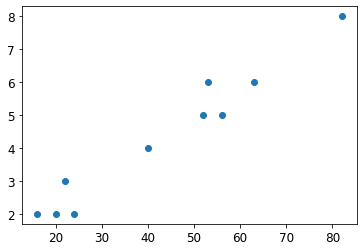

In [23]:
plt.scatter(heights, flowers)

In [21]:
def predict(theta, x):
  return theta * x 

In [24]:
def loss(theta, x, y):
  return ((predict(theta, x) - y) ** 2).mean()

In [25]:
theta = tensor([np.random.normal()]).requires_grad_()

In [26]:
L = loss(theta, heights, flowers)
L

tensor(127.5024, grad_fn=<MeanBackward0>)

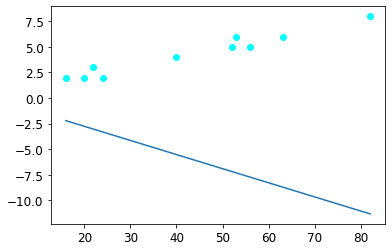

In [30]:
plt.scatter(heights, flowers, label = "act", color = "aqua")
plt.plot(heights, predict(theta.detach(), heights), label = "pred")

In [ ]:
L.backward()
print(theta.grad)